In [8]:
import json
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn import metrics
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [9]:
# Read the files
dj = pd.read_json('uber.json')
df_main = pd.DataFrame(dj)

In [10]:
df_main.shape # Check the shape

(51212, 15)

In [11]:
df_uber=df_main # Creating a copy of dataset

In [12]:
df_uber.head() # Display dataset

,Date-time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [13]:
uber = df_uber[df_main.display_name != 'TAXI'] # Remove Taxi record

In [14]:
uber.head() #Display Dataframe

,Date-time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [15]:
import datetime # import date time function

In [16]:
uber.dtypes # checking type of each column

Date-time                  object
currency_code              object
display_name               object
distance                  float64
duration                    int64
end_latitude              float64
end_longitude             float64
estimate                   object
high_estimate             float64
localized_display_name     object
low_estimate              float64
product_id                 object
start_latitude            float64
start_longitude           float64
time                       object
dtype: object

In [17]:
uber = uber.rename(columns = {'Date-time':'date_time'}) # Renaming Column

In [18]:
uber.head() # Display dataframe

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [19]:
df = pd.DataFrame(uber.date_time.str.split(' ',1).tolist(),
                                   columns = ['Date','Time'])
df.head() #Dataframe to check Date range

,Date,Time
0,2017-12-05,22:47:56
1,2017-12-05,22:47:56
2,2017-12-05,22:47:56
3,2017-12-05,22:47:56
4,2017-12-05,22:47:56


In [20]:
print(min(df.Date))
print(max(df.Date)) # Calculation of Date Range

2017-12-05
2017-12-13


In [21]:
df.head()

,Date,Time
0,2017-12-05,22:47:56
1,2017-12-05,22:47:56
2,2017-12-05,22:47:56
3,2017-12-05,22:47:56
4,2017-12-05,22:47:56


In [22]:
uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [23]:
uber['date_time'] = pd.to_datetime(uber['date_time']) # Convert to date time format

In [24]:
 # Splitting Date Time into separate column to get the Date and day of the week
uber['date'] = uber['date_time'].dt.date

uber['day_of_week'] = uber['date_time'].dt.weekday_name

In [25]:


uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday


In [26]:
def weather(x):
    x = x.strftime('%Y-%m-%d')
    if x in ['2017-12-05', '2017-12-06']:
        return 'Rainy'
    elif x in ['2017-12-09']:
        return 'Snowy'
    elif x in ['2017-12-07', '2017-12-10', '2017-12-13']:
        return 'Sunny'
    else:
        return 'Cloudy'  #Function to get weather details

In [27]:
uber['Weather'] = uber['date'].apply(weather)

In [28]:
uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy


In [30]:
uber.count() # to check if null values are present

date_time                 43896
currency_code             43896
display_name              43896
distance                  43896
duration                  43896
end_latitude              43896
end_longitude             43896
estimate                  43896
high_estimate             43896
localized_display_name    43896
low_estimate              43896
product_id                43896
start_latitude            43896
start_longitude           43896
time                      43896
date                      43896
day_of_week               43896
Weather                   43896
dtype: int64

In [31]:
print(min(uber.index))
print(max(uber.index)) # min and max values are listed

0
51210


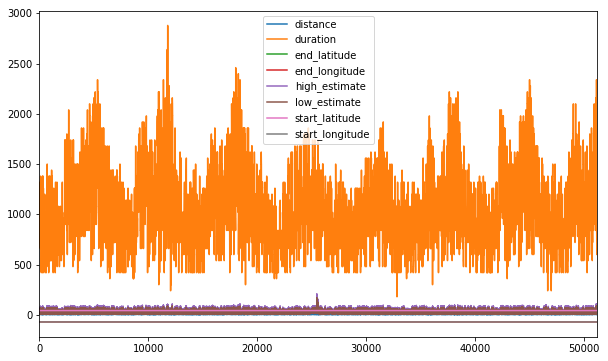

In [32]:
uber.plot() #PLot dataset to see variable range

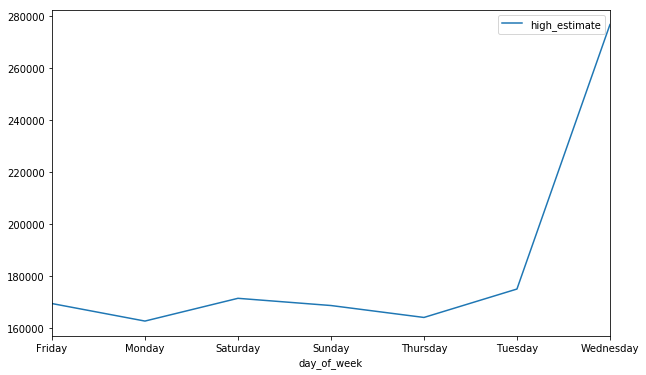

In [33]:
import numpy as np
uber_by_day = uber[["day_of_week","high_estimate"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot(); # mid week has the highest high-price estimate of all probably because lesser people take rides in the middle of the week

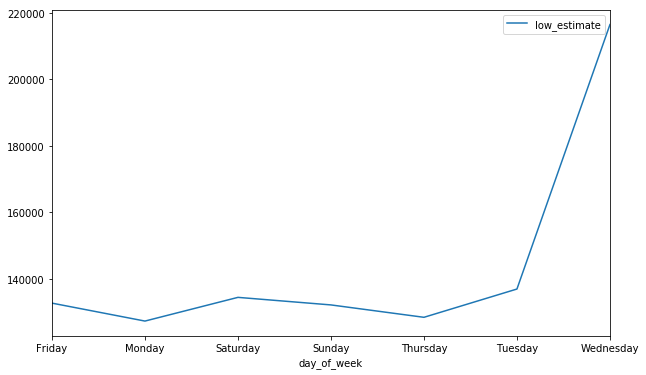

In [34]:
import numpy as np
uber_by_day = uber[["day_of_week","low_estimate"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();  # mid week has the highest low - price estimate of all probably because lesser people take rides in the middle of the week

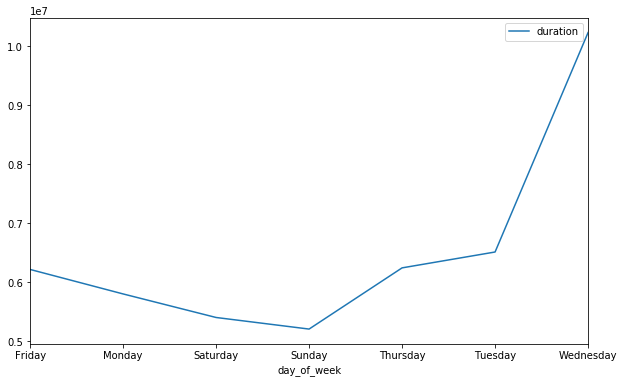

In [35]:
import numpy as np
uber_by_day = uber[["day_of_week","duration"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();
#duration of the ride is also highest in mid week

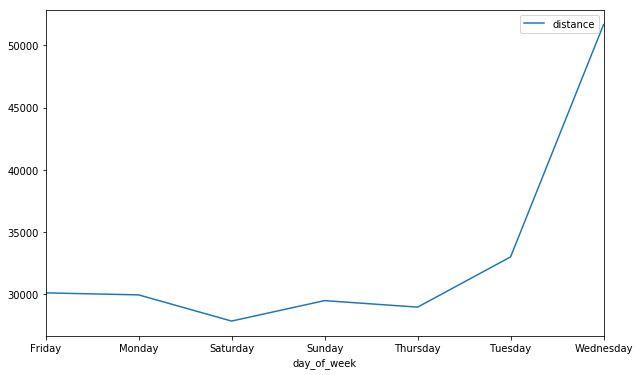

In [36]:
import numpy as np
uber_by_day = uber[["day_of_week","distance"]].groupby("day_of_week").aggregate(np.sum) # to find the day on which distance travelled is the most
uber_by_day.plot();
# as duration is more, consequently the distance is also more

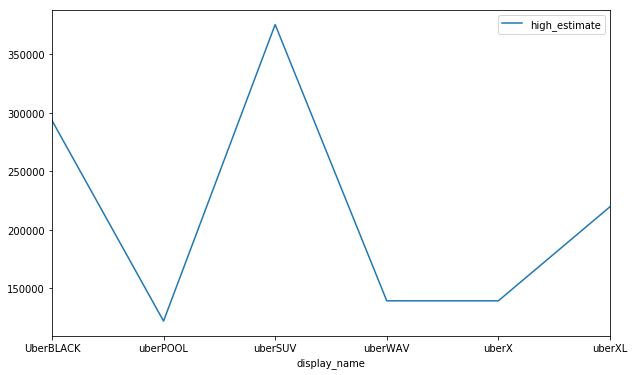

In [37]:
import numpy as np
uber_by_name = uber[["display_name","high_estimate"]].groupby("display_name").aggregate(np.sum)
uber_by_name.plot();
#The high estimate is more

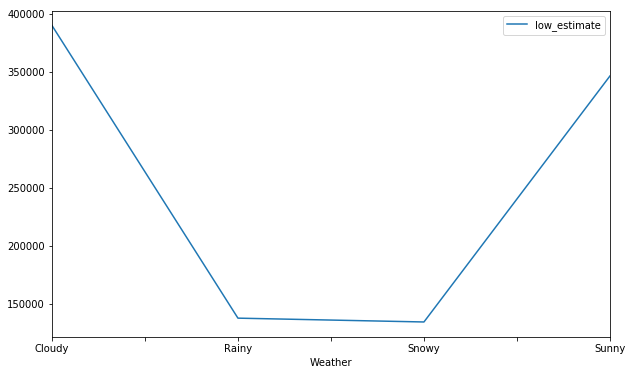

In [38]:
import numpy as np
uber_by_weather = uber[["Weather","low_estimate"]].groupby("Weather").aggregate(np.sum)
uber_by_weather.plot();
# the low estimate is lower for snowy and rainy days

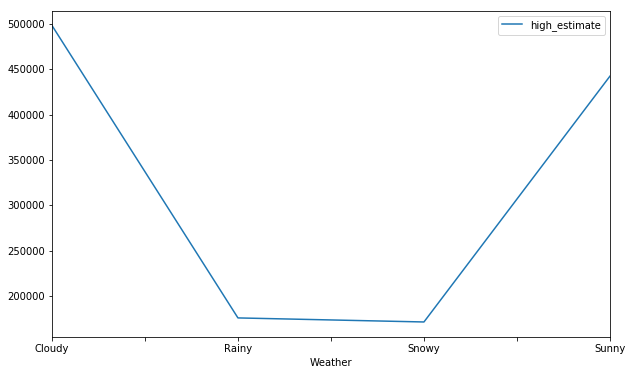

In [39]:
import numpy as np
uber_by_weather = uber[["Weather","high_estimate"]].groupby("Weather").aggregate(np.sum)
uber_by_weather.plot();
#high estimate is also lower for rainy and snowy days but higher forsunny and most for cloudy